# An analysis into Google Play Store Apps

This project will be undertaken using data about Google Play Store Apps, taken from [kaggle.com](https://www.kaggle.com/datasets/lava18/google-play-store-apps?select=googleplaystore.csv). The data extracted is in the form of two separate csv files, one collating data about the specific apps and app categories on the store, and the other containing details about user reviews for each app. The data from both files will be explored in this project.

### Imports

In [732]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Loading the csv files as dataframes

In [733]:
apps = pd.read_csv('googleplaystore.csv')
apps.head()
reviews = pd.read_csv('googleplaystore_user_reviews.csv')
reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


## Cleaning the data

Before manipulating the data for visualisation purposes, it is important to clean the dataframes to ensure that it is accurate and complete.
First, the dataframe is checked for any duplicates, which are then removed to eliminate any redundant data.

The original number of apps in this DataFrame was 10831, but since removing duplicates, this has reduced to 10358. I chose to include the argument (inplace=True) to remove the duplicates from the original DataFrame that is being worked with. The DataFrame will later be reindexed to adjust for the now deleted duplicated values.

In [734]:
apps[apps.duplicated()]
apps.drop_duplicates(inplace=True)
# apps_index = apps.reset_index()
# apps_index

In [735]:
# apps_index.sort_values('Price')

In [736]:
# Changing the Price value for index 9990 from 'Everyone' (which does not make sense as a price) to 0.
# apps_index.at[9990, 'Price'] = 0

### Editing the Price Column

Removing the $ symbol from the price amounts and converting the Price column into floats. This is to enable this column to perform mathematical calculations, such as the sum and mean, when it comes to querying the data.

In [737]:
apps_price = apps['Price'].str.replace('$', '')
apps_price
apps['Price'] = apps_price
apps
# # apps_index['Price'].astype(float)
# apps_index['Price'] = apps_index['Price'].astype(float)
# # Shows that the Price column has been converted into a float
# apps_index.dtypes
# # apps['Price2'] = apps2
# # apps
# # # apps['Price'].astype(float)
# # apps['Price'] = apps['Price'].astype(float)
# # apps['Price'].sum()
# # apps.dtypes

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


Since I removed the $ symbol from each individual price value, I have ammended the column title to make it clear what the currency is.

In [738]:
apps = apps.rename(columns={'Price': 'Price ($)'})
apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price ($),Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


### Updating an incomplete row

I noticed that the app 'Life Made WI-Fi Touchscreen Photo Frame' did not have its data inputted accurately, as all of the fields beginning in the Category column need to be shifted one place to the right to ensure that the data matches the column heading it should be placed in. For instance, the Category value is currently 1.9, which is not correct for a Category name, but makes sense for the Rating, which is the next column along. This is the case for all of the subsequent column values.
The Category field is consequently left blank, making it incomplete, so I have added in an appropriate Category to fill this in. I have also updated the Content Rating and Genres fields to reflect so that they are not NaN values. I have done this by consulting on the Google Play Store to see what those values should be.

Locating the specific app that needs to be edited:

In [739]:
wifi_app = apps[apps.App == 'Life Made WI-Fi Touchscreen Photo Frame']
wifi_app

,App,Category,Rating,Reviews,Size,Installs,Type,Price ($),Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Shifting the values of the Category column to the Android Ver column one place to the right:

In [740]:
wifi_app2 = wifi_app[['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price ($)', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']]
wifi_app_shifted = wifi_app2.shift(periods=1, axis="columns")
wifi_app_shifted

,Category,Rating,Reviews,Size,Installs,Type,Price ($),Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,None,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up


Updating the wifi_app_shifted DataFrame to include the App name and updating the Category, Content Rating and Genres values:

In [749]:
# new_wifi_app = wifi_app_shifted.insert(0, 'App', ['Life Made WI-Fi Touchscreen Photo Frame'], True)
# new_wifi_app
# wifi_app_shifted.drop(columns=['App'])
# wifi_app_shifted
# wifi_app_shifted.drop(columns=['App'])
# new_wifi_app = wifi_app_shifted.drop(columns=['App'])
# new_wifi_app.insert(0, 'App', ['Life Made WI-Fi Touchscreen Photo Frame'], True)
# new_wifi_app
# # new_wifi_app = wifi_app_shifted.drop(columns=['App'])
# # new_wifi_app
# new_wifi_app.at[9990, 'Category'] = 'LIFESTYLE'
# new_wifi_app.at[9990, 'Content Rating'] = 'Everyone'
# new_wifi_app.at[9990, 'Genres'] = 'Lifestyle'
# # new_wifi_app
new_wifi_app

,App,Category,Rating,Reviews,Size,Installs,Type,Price ($),Content Rating,Genres,Last Updated,Current Ver,Android Ver
9990,Life Made WI-Fi Touchscreen Photo Frame,LIFESTYLE,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,Lifestyle,"February 11, 2018",1.0.19,4.0 and up


Dropping the current row with the index of the app:

In [742]:
apps = apps.drop([9990])
apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price ($),Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


Concatenating the new_wifi_app DataFrame to the apps DataFrame:

In [743]:
apps = pd.concat([apps, new_wifi_app])
apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price ($),Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


Resetting the index for the apps DataFrame to account for the newly added new_wifi_app DataFrame that was amended above:

In [744]:
apps.reset_index(inplace=True)
apps

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price ($),Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10353,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10354,10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10355,10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10356,10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


### Reformatting the Rating, Reviews, Installs and Price columns

Removing the '+' and ',' from the Installs so that the values can be converted into integers:

In [750]:
apps_installs = apps['Installs'].str.replace('+', '')
apps['Installs'] = apps_installs
apps.head()

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price ($),Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [751]:
apps_installs2 = apps['Installs'].str.replace(',', '')
apps_installs2

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10353         100
10354        1000
10355        1000
10356    10000000
10357        1000
Name: Installs, Length: 10358, dtype: object

In [752]:
apps['Installs'] = apps_installs2
apps.head()

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price ($),Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Converting the Installs and Reviews to integers and the Price and Rating to floats:

In [769]:
apps['Installs'] = apps['Installs'].astype(int)
apps['Price ($)'] = apps['Price ($)'].astype(float)
apps['Rating'] = apps['Rating'].astype(float)
apps['Reviews'] = apps['Reviews'].astype(int)
apps.dtypes

index               int64
App                object
Category           object
Rating            float64
Reviews             int32
Size               object
Installs            int32
Type               object
Price ($)         float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [ ]:
apps = apps.drop(columns=['level_0', 'index'])

In [760]:
result = apps[apps.Installs == 'Free']
result

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price ($),Content Rating,Genres,Last Updated,Current Ver,Android Ver
9989,10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [761]:
apps = apps.drop([9989])

In [779]:
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price ($),Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Data Visualisation

In [835]:
ratings_mean = apps.groupby('Category').mean(numeric_only=True)
ratings_mean

,Rating,Reviews,Installs,Price ($)
Category,,,,
ART_AND_DESIGN,4.358065,2.637600e+04,1.912894e+06,0.091846
AUTO_AND_VEHICLES,4.190411,1.369019e+04,6.250613e+05,0.158471
BEAUTY,4.278571,7.476226e+03,5.131519e+05,0.000000
BOOKS_AND_REFERENCE,4.347458,9.510099e+04,8.332476e+06,0.520739
BUSINESS,4.102593,2.900979e+04,2.027382e+06,0.411479
COMICS,4.155172,5.638793e+04,9.347692e+05,0.000000
COMMUNICATION,4.151466,1.642824e+06,6.598983e+07,0.227158
DATING,3.971698,2.829284e+04,1.053756e+06,0.160357
EDUCATION,4.375969,1.781962e+05,4.107323e+06,0.138154


In [845]:
averages = apps.groupby('Category').mean(numeric_only=True)
average_price = averages[averages['Price ($)'] > 0.99]
average_price
# total_price[['Price ($)', 'Rating']]

,Rating,Reviews,Installs,Price ($)
Category,,,,
EVENTS,4.435556,2515.906250,2.495806e+05,1.718594
FAMILY,4.191153,204205.851261,5.168138e+06,1.245919
FINANCE,4.127445,47221.919444,2.139858e+06,8.057861
LIFESTYLE,4.088889,34279.663102,1.430012e+06,6.312487
MEDICAL,4.182450,3423.424020,1.034416e+05,2.501691


<Axes: xlabel='Category', ylabel='Price ($)'>

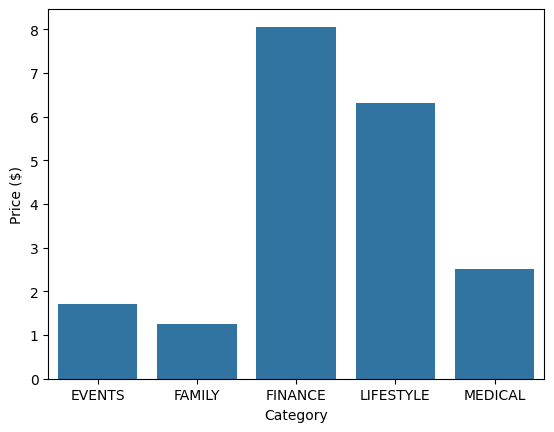

In [846]:
sns.barplot(average_price, x="Category", y="Price ($)")

In [844]:
averages = apps.groupby('Category').mean(numeric_only=True)
# average_price = averages[averages['Price ($)'] > 0.99]
averages['Rating']

Category
ART_AND_DESIGN         4.358065
AUTO_AND_VEHICLES      4.190411
BEAUTY                 4.278571
BOOKS_AND_REFERENCE    4.347458
BUSINESS               4.102593
COMICS                 4.155172
COMMUNICATION          4.151466
DATING                 3.971698
EDUCATION              4.375969
ENTERTAINMENT          4.136036
EVENTS                 4.435556
FAMILY                 4.191153
FINANCE                4.127445
FOOD_AND_DRINK         4.164151
GAME                   4.281285
HEALTH_AND_FITNESS     4.261450
HOUSE_AND_HOME         4.164706
LIBRARIES_AND_DEMO     4.178462
LIFESTYLE              4.088889
MAPS_AND_NAVIGATION    4.051613
MEDICAL                4.182450
NEWS_AND_MAGAZINES     4.128505
PARENTING              4.300000
PERSONALIZATION        4.333871
PHOTOGRAPHY            4.182895
PRODUCTIVITY           4.201796
SHOPPING               4.251485
SOCIAL                 4.254918
SPORTS                 4.225175
TOOLS                  4.047411
TRAVEL_AND_LOCAL       4.094146

<Axes: xlabel='Price ($)', ylabel='Rating'>

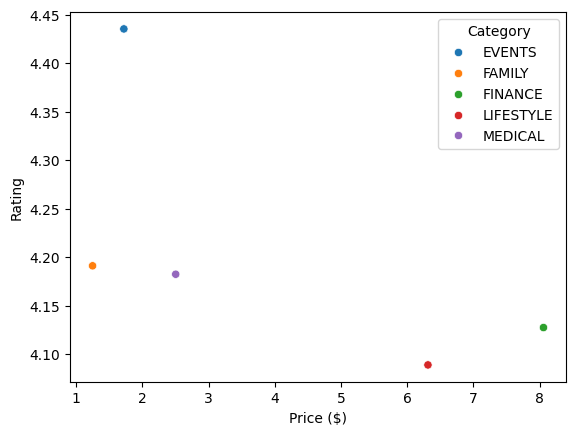

In [829]:
sns.scatterplot(average_price, y="Rating", x="Price ($)", hue="Category")

(0.0, 12.0)

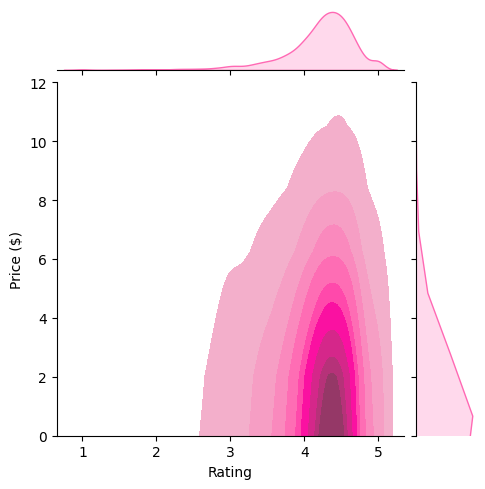

In [894]:
jointplot = sns.jointplot(x=apps['Rating'], y=apps['Price ($)'], kind='kde', color='hotpink', fill=True, height=5)
# jointplot.set(ylim=(0,50))
jointplot.ax_marg_y.set_ylim(0, 12)

<Axes: xlabel='Rating', ylabel='Category'>

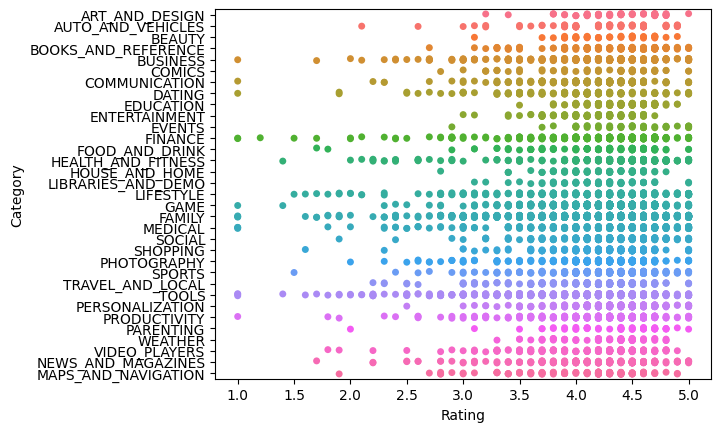

In [843]:
sns.stripplot(data=apps, x="Rating", y="Category", hue="Category")

In [862]:
# sns.barplot(data=apps, x='day', y='total_bill', errorbar=None, hue='sex')
# Top rated apps
average_ratings = apps.groupby('Category').mean(numeric_only=True)
average_ratings[average_ratings['Rating'] > 4.25]
category_ratings = average_ratings.sort_values('Rating', ascending=False).head(10)
category_ratings

,Rating,Reviews,Installs,Price ($)
Category,,,,
EVENTS,4.435556,2.515906e+03,2.495806e+05,1.718594
EDUCATION,4.375969,1.781962e+05,4.107323e+06,0.138154
ART_AND_DESIGN,4.358065,2.637600e+04,1.912894e+06,0.091846
BOOKS_AND_REFERENCE,4.347458,9.510099e+04,8.332476e+06,0.520739
PERSONALIZATION,4.333871,1.937968e+05,5.346636e+06,0.390387
PARENTING,4.300000,1.597218e+04,5.253518e+05,0.159667
GAME,4.281285,1.262745e+06,2.813918e+07,0.256289
BEAUTY,4.278571,7.476226e+03,5.131519e+05,0.000000
HEALTH_AND_FITNESS,4.261450,1.008013e+05,4.447786e+06,0.210294


Text(0.5, 1.0, 'Boxplot of the top 10 best rated app categories')

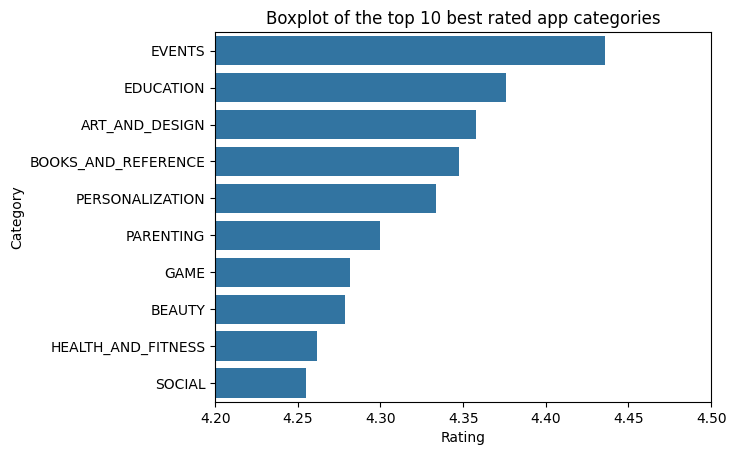

In [883]:
ratings_bar = sns.barplot(category_ratings, y="Category", x="Rating")
ratings_bar.set(xlim=(4.2,4.5))
plt.title('Boxplot of the top 10 best rated app categories')

In [886]:
events = apps[apps['Category'] == 'EVENTS']
events

,App,Category,Rating,Reviews,Size,Installs,Type,Price ($),Content Rating,Genres,Last Updated,Current Ver,Android Ver
856,All Events in City,EVENTS,4.0,3782,9.5M,100000,Free,0.0,Everyone,Events,"June 12, 2018",8.4,4.0.3 and up
857,Ticketmaster Event Tickets,EVENTS,4.0,40113,36M,5000000,Free,0.0,Everyone,Events,"July 23, 2018",Varies with device,Varies with device
858,Reminder,EVENTS,4.5,7074,6.3M,500000,Free,0.0,Everyone,Events,"June 25, 2018",1.57,4.1 and up
859,Birdays - Birthday reminder,EVENTS,4.5,2153,5.9M,50000,Free,0.0,Everyone,Events,"December 14, 2017",1.5.0,4.1 and up
860,"StubHub - Tickets to Sports, Concerts & Events",EVENTS,4.0,26089,Varies with device,5000000,Free,0.0,Everyone,Events,"August 2, 2018",4.2.1,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9178,FAST EO,EVENTS,5.0,1,Varies with device,10,Free,0.0,Everyone,Events,"May 15, 2018",1.0.3,4.1 and up
9218,eP Scanner,EVENTS,NaN,0,20M,100,Free,0.0,Everyone,Events,"October 13, 2017",1.5,4.4 and up
9622,EY Belgium Inhouse Day 2018,EVENTS,NaN,0,24M,10,Free,0.0,Everyone,Events,"May 14, 2018",18.4.8.0,4.1 and up
10122,FL Bankers,EVENTS,NaN,0,3.4M,10,Free,0.0,Everyone,Events,"June 5, 2018",1.0.1,4.2 and up
